<a href="https://colab.research.google.com/github/mks2607/Data_mks/blob/mks2607/Google_Play_Store_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import zipfile
import os

# Укажите имя вашего ZIP-файла
zip_file_name = '/content/archive (2).zip'

# Разархивируйте файл
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')  # Укажите папку для извлечения


In [4]:
df_play_store = pd.read_csv('/content/extracted_folder/googleplaystore.csv')
df_user_reiews = pd.read_csv('/content/extracted_folder/googleplaystore_user_reviews.csv')

In [6]:
file_path = '/content/extracted_folder/license.txt'  # Укажите путь к вашему файлу

with open(file_path, 'r') as file:
    content = file.read()
    print(content)


This work is licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/.


In [8]:
content

'This work is licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/.'

In [10]:
df_play_store.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df_user_reiews.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [12]:
df_user_reiews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Оценить уровень эмоционального окраса Sentiment_Polarity
Определение: Значение Sentiment_Polarity обычно варьируется от -1 до +1:

-1: Очень отрицательное
0: Нейтральное
+1: Очень положительное

---

#Определить уровень нейтральности текста Sentiment_Subjectivity
Субъективность варьируется от 0 до 1:

0: Объективный текст — факты, без личных мнений или эмоций.
1: Субъективный текст — выражает личные мнения, чувства или эмоции.
---

# Статистика Sentiment
сколько позитивных, и сколько негативных отзывов.

---

In [23]:
df_user_reiews.drop('Translated_Review', axis=1, inplace=True)

In [24]:
df_user_reiews

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN


In [26]:
df_mean_users = df_user_reiews.groupby(['App','Sentiment']).mean()

#группировать по названию
#группировка по sentiment
#вывод ср знач - Sentiment_Polarity
#вывод ср знач - Sentiment_Subjectivity


In [28]:
df_mean_users.reset_index()

#делаем сводную таб где значение по строке - app
# значение по столбцу это тип коментария - sentiment

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Negative,-0.405000,0.355000
1,10 Best Foods for You,Neutral,0.000000,0.000000
2,10 Best Foods for You,Positive,0.588717,0.571409
3,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Negative,-0.112500,0.622222
4,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Neutral,0.000000,0.012500
...,...,...,...,...
2371,Hotwire Hotel & Car Rental App,Neutral,0.000000,0.162500
2372,Hotwire Hotel & Car Rental App,Positive,0.499550,0.603289
2373,Housing-Real Estate & Property,Negative,-0.337927,0.371935
2374,Housing-Real Estate & Property,Neutral,0.000000,0.000000


In [29]:
df_mean_users

Sentiment_Polarity  \
App                              Sentiment                       
10 Best Foods for You            Negative            -0.405000   
                                 Neutral              0.000000   
                                 Positive             0.588717   
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室 Negative            -0.112500   
                                 Neutral              0.000000   
...                                                        ...   
Hotwire Hotel & Car Rental App   Neutral              0.000000   
                                 Positive             0.499550   
Housing-Real Estate & Property   Negative            -0.337927   
                                 Neutral              0.000000   
                                 Positive             0.366162   

                                            Sentiment_Subjectivity  
App                              Sentiment                          
10 Best Foods for You            Negative                 0.355000  
                                 Neutral                  0.000000  
                                 Positive                 0.571409  
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室 Negative                 0.622222  
                                 Neutral                  0.012500  
...                                                            ...  
Hotwire Hotel & Car Rental App   Neutral                  0.162500  
                                 Positive                 0.603289  
Housing-Real Estate & Property   Negative                 0.371935  
                                 Neutral                  0.000000  
                                 Positive                 0.528727  

[2376 rows x 2 columns]

In [46]:
pivot_table_Polarity = pd.pivot_table(df_mean_users, values='Sentiment_Polarity', index='App', columns='Sentiment', aggfunc='mean', fill_value=0).reset_index()
pivot_table_Polarity

Sentiment,App,Negative,Neutral,Positive
0,10 Best Foods for You,-0.405000,0.0,0.588717
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,-0.112500,0.0,0.509958
2,11st,-0.336458,0.0,0.417695
3,1800 Contacts - Lens Store,-0.197222,0.0,0.416171
4,1LINE – One Line with One Touch,-0.410268,0.0,0.397821
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,-0.236090,0.0,0.304313
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,-0.500000,0.0,0.591765
862,Hotstar,-0.242406,0.0,0.329669
863,Hotwire Hotel & Car Rental App,-0.303472,0.0,0.499550


In [47]:
pivot_table_Subjectivity = pd.pivot_table(df_mean_users, values='Sentiment_Subjectivity', index='App', columns='Sentiment', aggfunc='mean', fill_value=0).reset_index()
pivot_table_Subjectivity

Sentiment,App,Negative,Neutral,Positive
0,10 Best Foods for You,0.355000,0.000000,0.571409
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.622222,0.012500,0.680594
2,11st,0.435615,0.133333,0.581550
3,1800 Contacts - Lens Store,0.361111,0.071429,0.693858
4,1LINE – One Line with One Touch,0.534970,0.000000,0.625860
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,0.643515,0.203125,0.562856
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.855556,0.000000,0.635588
862,Hotstar,0.507714,0.137500,0.582061
863,Hotwire Hotel & Car Rental App,0.621759,0.162500,0.603289


<ipython-input-50-fd0e8a9dda8d>:12: UserWarning: Glyph 25214 (\N{CJK UNIFIED IDEOGRAPH-627E}) missing from current font.
  plt.tight_layout()
<ipython-input-50-fd0e8a9dda8d>:12: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  plt.tight_layout()
<ipython-input-50-fd0e8a9dda8d>:12: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  plt.tight_layout()
<ipython-input-50-fd0e8a9dda8d>:12: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from current font.
  plt.tight_layout()
<ipython-input-50-fd0e8a9dda8d>:12: UserWarning: Glyph 20860 (\N{CJK UNIFIED IDEOGRAPH-517C}) missing from current font.
  plt.tight_layout()
<ipython-input-50-fd0e8a9dda8d>:12: UserWarning: Glyph 32887 (\N{CJK UNIFIED IDEOGRAPH-8077}) missing from current font.
  plt.tight_layout()
<ipython-input-50-fd0e8a9dda8d>:12: UserWarning: Glyph 23653 (\N{CJK UNIFIED IDEOGRAPH-5C65}) missing from current font.
  plt.tight_layout()
<ipyth

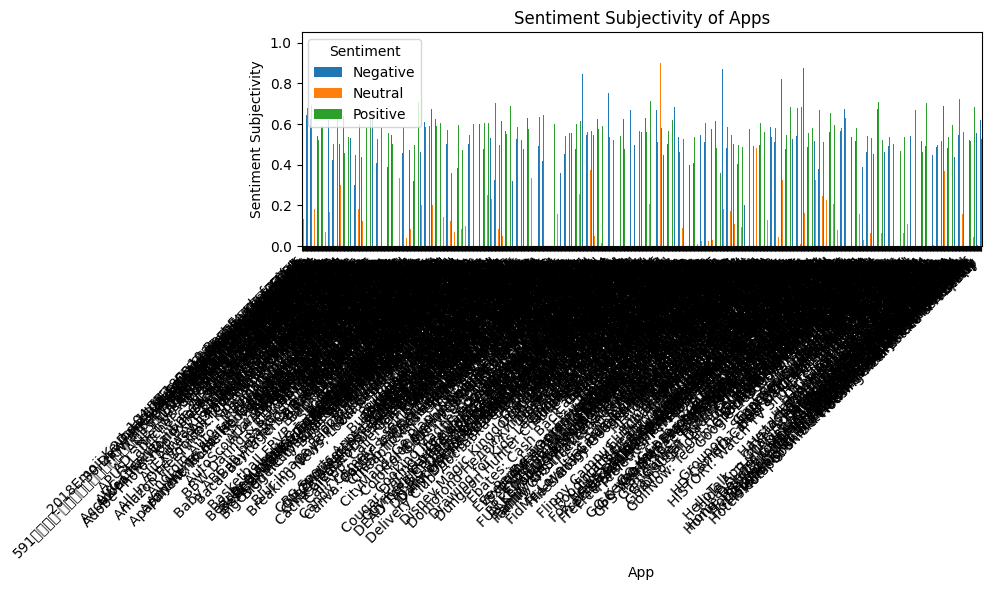

In [50]:
# Plot the data
pivot_table_Subjectivity.plot(x='App', y=['Negative', 'Neutral', 'Positive'], kind='bar', figsize=(10, 6))

# Customize the plot
plt.xlabel('App')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Subjectivity of Apps')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')

# Show the plot
plt.tight_layout()
plt.show()